In [57]:
import numdifftools as dif
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
def SGD_step(Loss, batch,th0,alpha):
    th = th0
    for b in batch:
        f = lambda yy: Loss(yy,b)
        grad = dif.Gradient(f)
        th = th - alpha * grad(th)
    loss = 0 
    for b in batch:
        loss += Loss(th,b)
    loss = loss/len(b)
    return loss,th

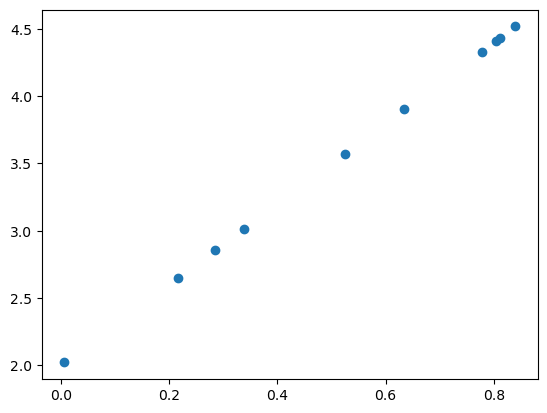

In [95]:
def minFunc(th, dat_single):
    l = (th[0]*dat_single[0]+th[1]-dat_single[1])**2
    return l

x = np.random.random(size=10)
y = 3*x+2
dat = np.array(list(zip(x,y)))
th1 = np.random.random(size=2)*15
alpha = 1e-2
NBATCH = 2
plt.plot(x,y,'o')

In [96]:
batch = random.sample(list(dat),NBATCH)

minFunc(th1,batch[0])

33.714533741910124

In [97]:
l = []
ts = []
for _ in range(100):
    batch = random.sample(list(dat),NBATCH)
    ll, ths = SGD_step(minFunc,batch,th1,alpha)
    l.append(ll)
    th1 = ths
    ts.append(th1)

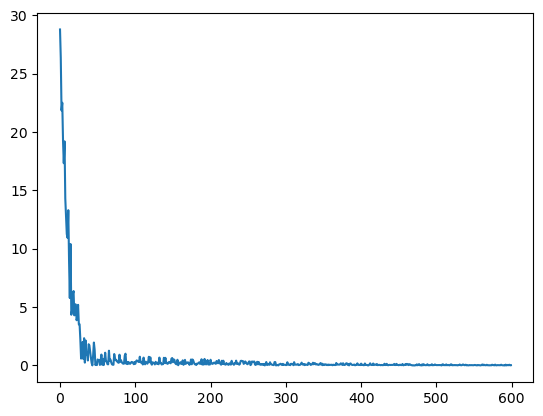

In [98]:
for _ in range(500):
    batch = random.sample(list(dat),NBATCH)
    ll, ths = SGD_step(minFunc,batch,th1,alpha)
    l.append(ll)
    th1 = ths
    ts.append(th1)
plt.plot(l)

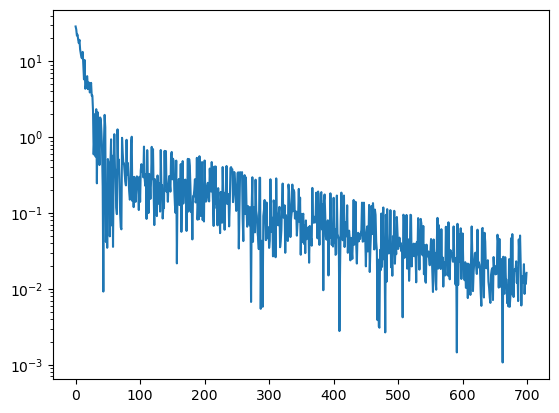

In [99]:
for _ in range(100):
    batch = random.sample(list(dat),NBATCH)
    ll, ths = SGD_step(minFunc,batch,th1,alpha)
    l.append(ll)
    th1 = ths
    ts.append(th1)
plt.plot(l)
plt.yscale('log')

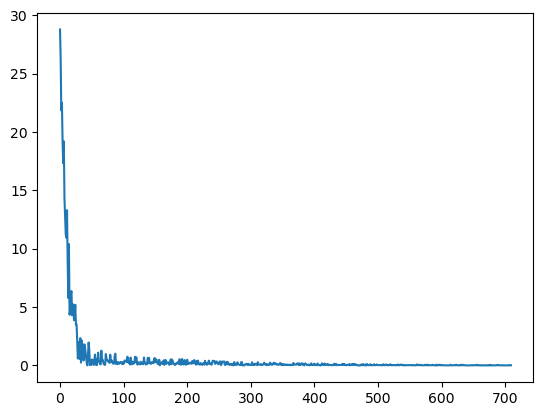

In [100]:
for _ in range(10):
    batch = random.sample(list(dat),NBATCH)
    ll, ths = SGD_step(minFunc,batch,th1,alpha)
    l.append(ll)
    th1 = ths
    ts.append(th1)
plt.plot(l)

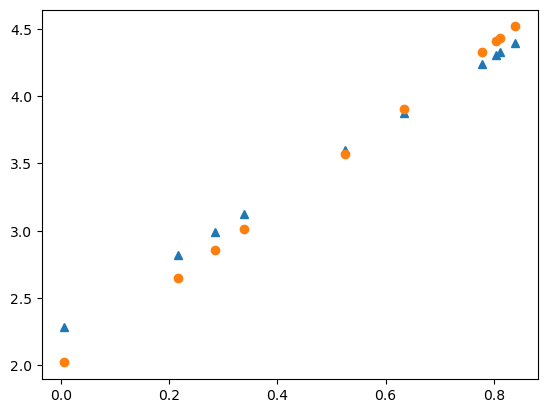

In [101]:
plt.plot(x,th1[0]*x+th1[1],'^')
plt.plot(x,y,'o')

In [102]:
th_array = np.array(ts)

In [103]:
tt0 = np.linspace(0,10,50)
tt1 = np.linspace(0,10,50)
images = np.zeros((50,50))

for i in range(50):
    for j in range(50):
        images[j,i] = np.mean([minFunc([tt0[i],tt1[j]],d) for d in dat])

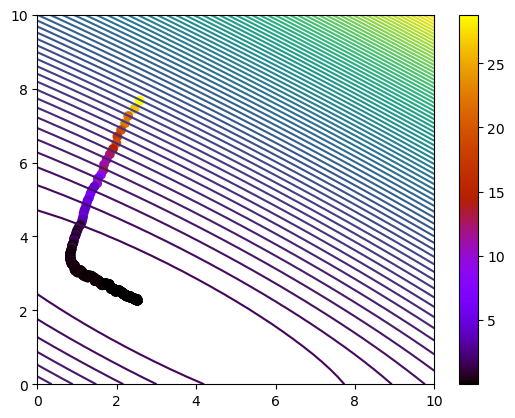

In [104]:
fig, ax  = plt.subplots(1,1)
im = ax.scatter(th_array[:,0],th_array[:,1],c=l,cmap='gnuplot')
X,Y = np.meshgrid(tt0,tt1)
plt.contour(X,Y,images,levels=80)
plt.colorbar(im,ax=ax)